Text(0.5, 1.0, 'Color Image')

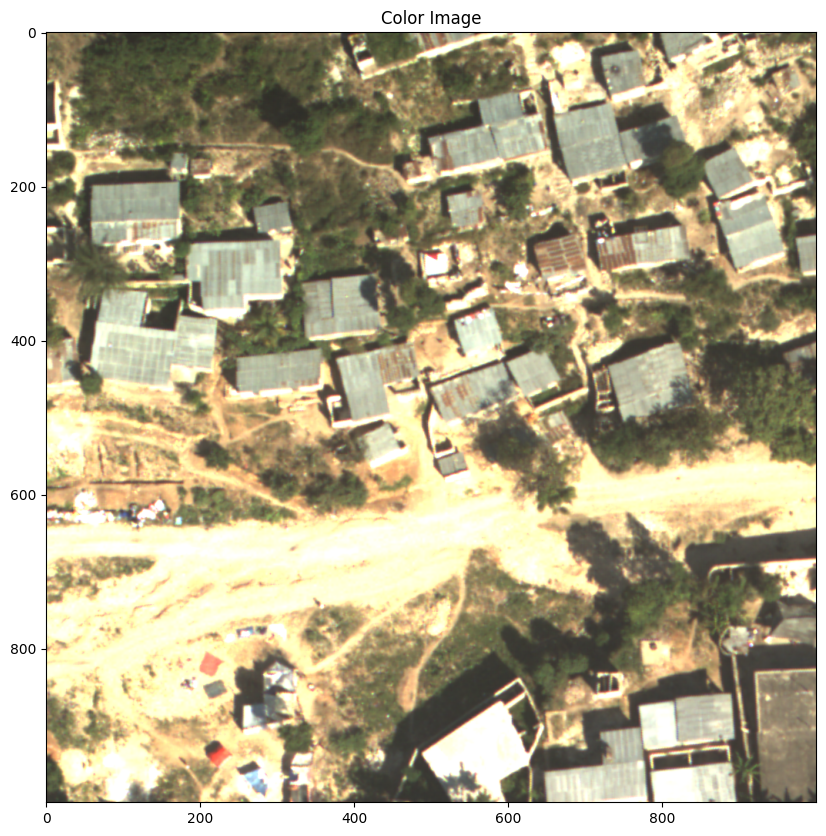

In [13]:
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO

# URL of the image
url = 'https://github.com/Hyunglok-Kim/EN5422_EV4238/raw/main/Haiti_Image.tif'

# Get the image from the URL
response = requests.get(url)
im = Image.open(BytesIO(response.content))

# Convert to numpy array and continue as before
imArray = np.array(im)
nrows, ncols, nbands = np.shape(imArray)

# Reshape the image array to num_observations by num_features
X = np.reshape(imArray, [nrows*ncols, nbands])

# Create and train the Gaussian Mixture Model
model = GaussianMixture(n_components=4, tol=0.1)
model.fit(X)

# Predict latent values
yhat = model.predict(X)

# Reshape the result into an image
imSubset_hat = np.reshape(yhat, [nrows, ncols])

# Plot the output, including the BIC in the title

plt.figure(figsize=(40, 10))

plt.imshow(imArray)
plt.title('Color Image')

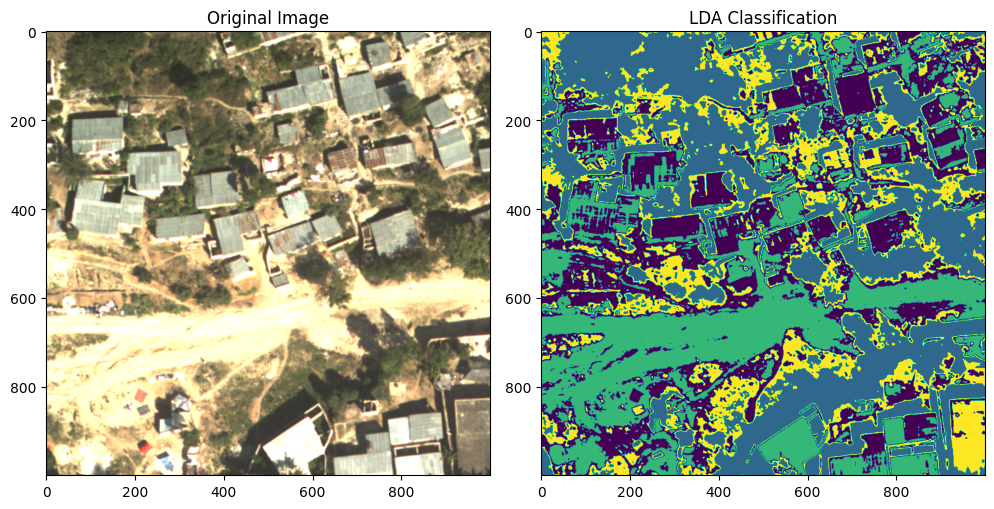

In [14]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

# Assuming X and yhat are already prepared as per the previous GMM process
# Here, yhat is considered as the true labels

# Train LDA model
lda = LinearDiscriminantAnalysis()
lda.fit(X, yhat)

# Predict the class using LDA model
yhat_lda = lda.predict(X)
im_lda = np.reshape(yhat_lda, [nrows, ncols])  # Reshape to the image format

# Plotting the results
plt.figure(figsize=(15, 10))

# Original Image
plt.subplot(131)
plt.imshow(imArray)
plt.title('Original Image')

# LDA Classification Result
plt.subplot(132)
plt.imshow(im_lda)
plt.title('LDA Classification')

plt.tight_layout()
plt.show()

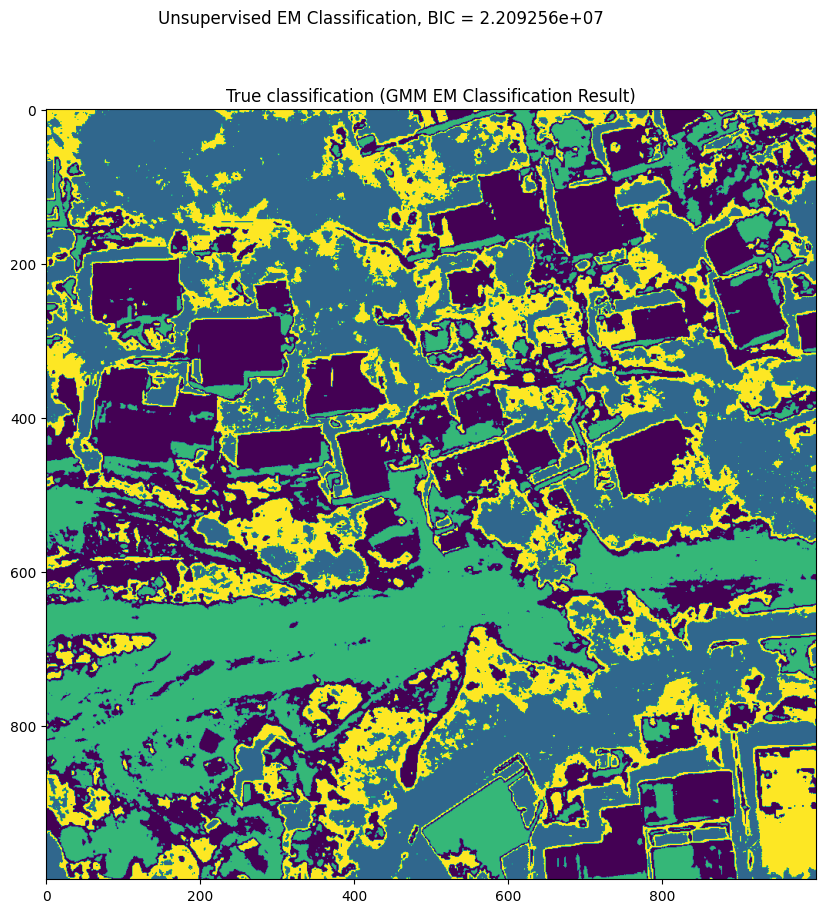

In [15]:
plt.figure(figsize=(40, 10))
plt.imshow(imSubset_hat)
plt.suptitle('Unsupervised EM Classification, BIC = ' + "{:e}".format(model.bic(X)))
plt.title('True classification (GMM EM Classification Result)')
plt.show()